**IMPORTING MODULES**




In [3]:
#add all import files here
# Import necessary modules for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
import os
warnings.filterwarnings('ignore')


# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Ensure that plots are displayed in the notebook
%matplotlib inline




**READING CSV FILE**




In [4]:
#reading csv (DON'T ADD ANYTHING HERE)

url = "https://raw.githubusercontent.com/sahyam2023/employee-salary/main/Salary_Data.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(url)


**CHECKING IF CSV IS PROPERLY IMPORTED BY RUNNING HEAD**




In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# **DATA CLEANING STARTS FROM HERE**




In [6]:
# Checking for missing values
print(df.isnull().sum())


Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [7]:
# Handling missing data: Drop rows with missing values
df = df.dropna()


In [8]:
# Checking for errors and inconsistencies
print("Unique values in 'Gender':", df['Gender'].unique())
print("Unique values in 'Education Level':", df['Education Level'].unique())
print("Unique values in 'Job Title':", df['Job Title'].unique())


Unique values in 'Gender': ['Male' 'Female' 'Other']
Unique values in 'Education Level': ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Unique values in 'Job Title': ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative

In [9]:
# Standardizing formats
df['Gender'] = df['Gender'].str.lower()
df['Education Level'] = df['Education Level'].str.lower()
df['Job Title'] = df['Job Title'].str.lower()


In [10]:
# Displaying cleaned dataset
print(df.head())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    male      bachelor's  software engineer                  5.0   
1  28.0  female        master's       data analyst                  3.0   
2  45.0    male             phd     senior manager                 15.0   
3  36.0  female      bachelor's    sales associate                  7.0   
4  52.0    male        master's           director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


# **EDA STARTS FROM HERE (EXPLANATORY DATA ANALYSIS)**

In [11]:
# Descriptive statistics of the dataset
print(df.describe())


               Age  Years of Experience         Salary
count  6698.000000          6698.000000    6698.000000
mean     33.623022             8.095178  115329.253061
std       7.615784             6.060291   52789.792507
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


**Explore the distribution of `Age`**


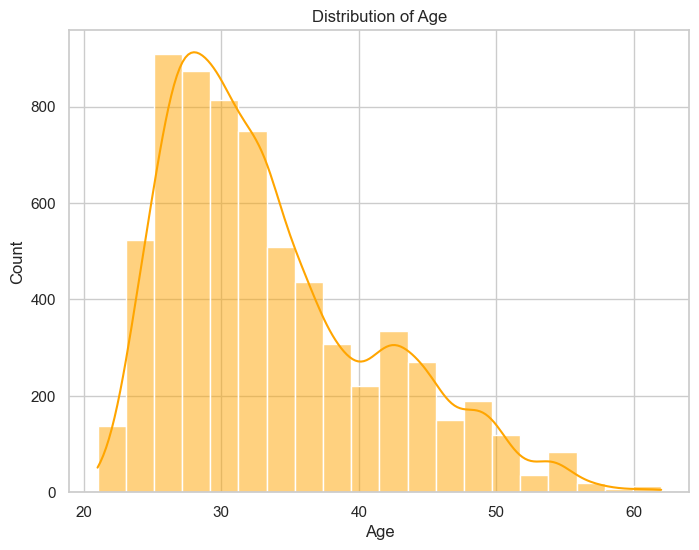

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='orange')
plt.title('Distribution of Age')
plt.show()



**Impact of `Education Level` on `Salary`**

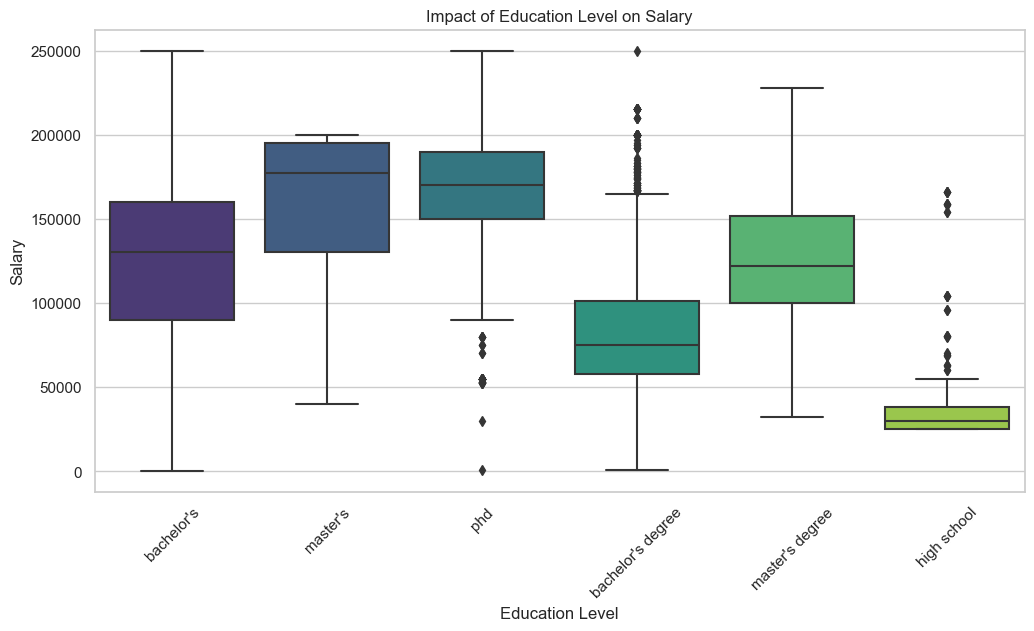

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Salary', data=df, palette='viridis')
plt.title('Impact of Education Level on Salary')
plt.xticks(rotation=45)
plt.show()


**Impact of `Job title` on `salary`**

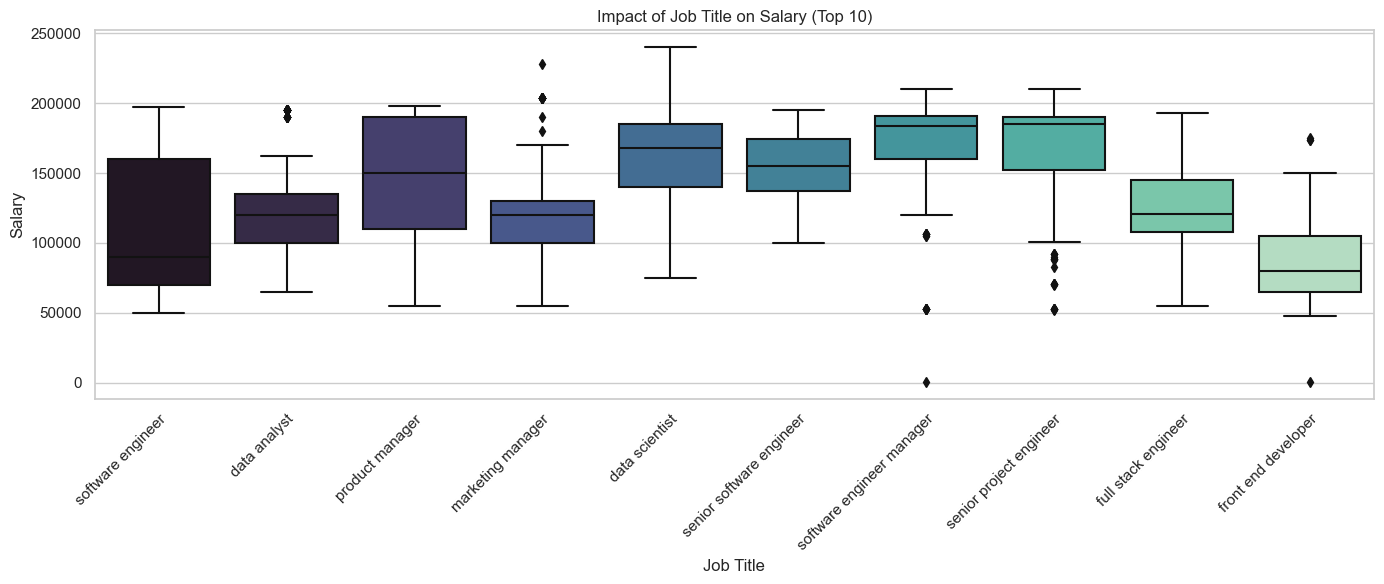

In [14]:
# Identify the top 10 most repeated job titles
top_job_titles = df['Job Title'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the rows with the top job titles
df_top_jobs = df[df['Job Title'].isin(top_job_titles)]

# Visualize the impact of 'Job Title' on 'Salary' for the top 10 job titles
plt.figure(figsize=(14, 6))
sns.boxplot(x='Job Title', y='Salary', data=df_top_jobs, palette='mako')
plt.title('Impact of Job Title on Salary (Top 10)')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()



**Impact of `Gender` on `Salary`**

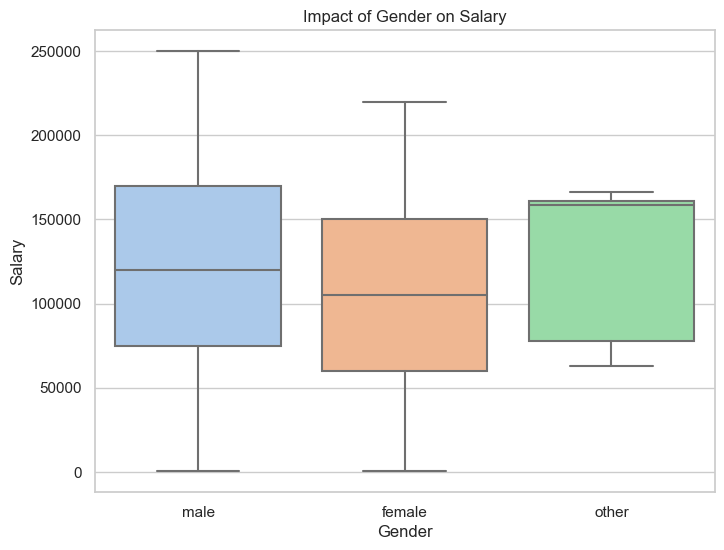

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=df, palette='pastel')
plt.title('Impact of Gender on Salary')
plt.show()


**Average `Salary` for Each `Job Title`:**

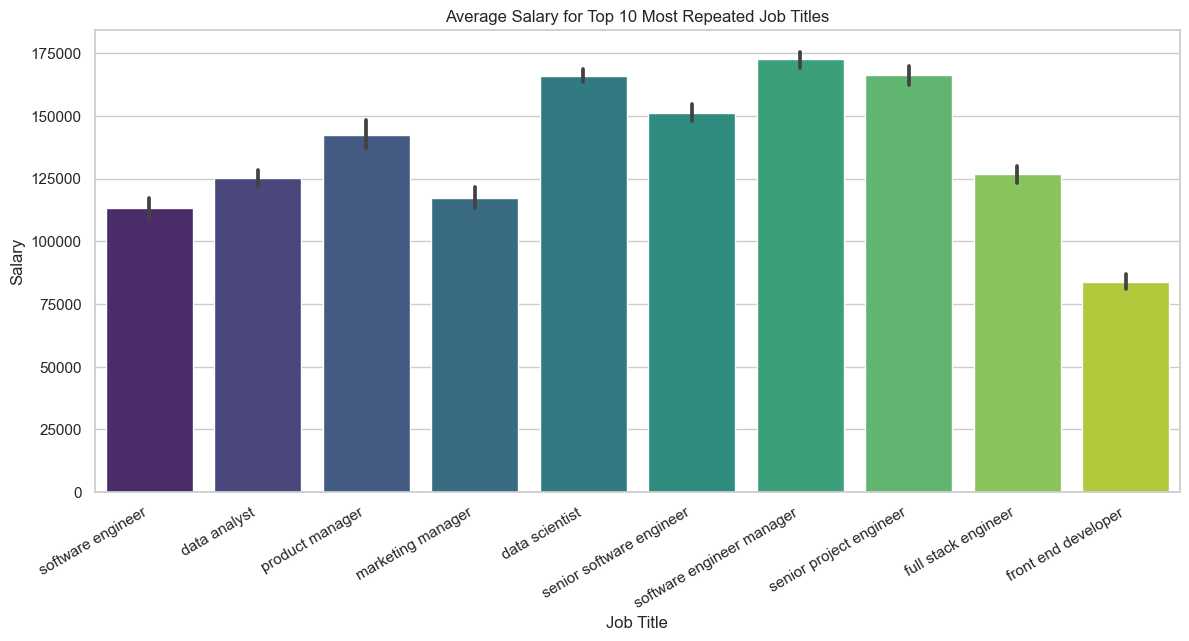

In [16]:
# Get the top 10 most repeated job titles
top_job_titles = df['Job Title'].value_counts().head(10).index

df_top_jobs = df[df['Job Title'].isin(top_job_titles)]

plt.figure(figsize=(14, 6))
sns.barplot(x='Job Title', y='Salary', data=df_top_jobs, palette='viridis')
plt.title('Average Salary for Top 10 Most Repeated Job Titles')
plt.xticks(rotation=30, ha='right')  
plt.show()


**`Salary Variation` with `Experience`**

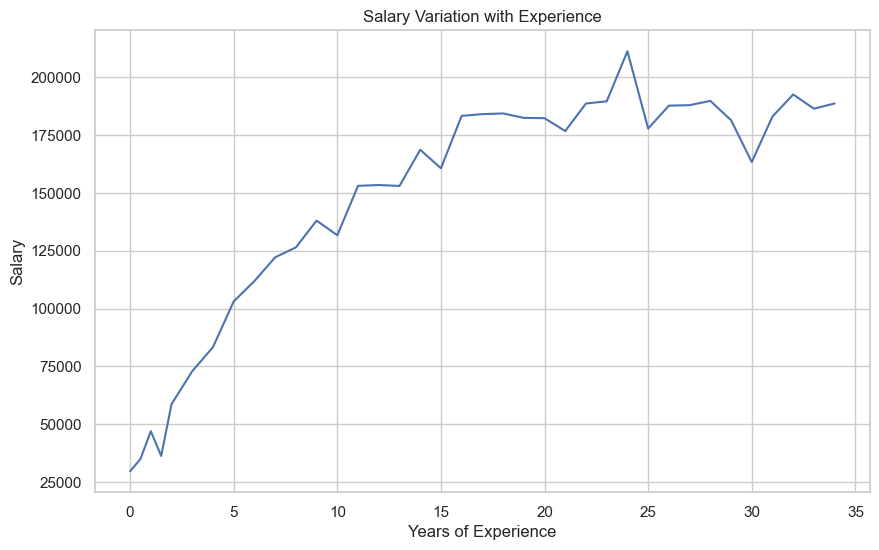

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Years of Experience', y='Salary', data=df, ci=None)
plt.title('Salary Variation with Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


**Highest-Paying `Job Titles`**

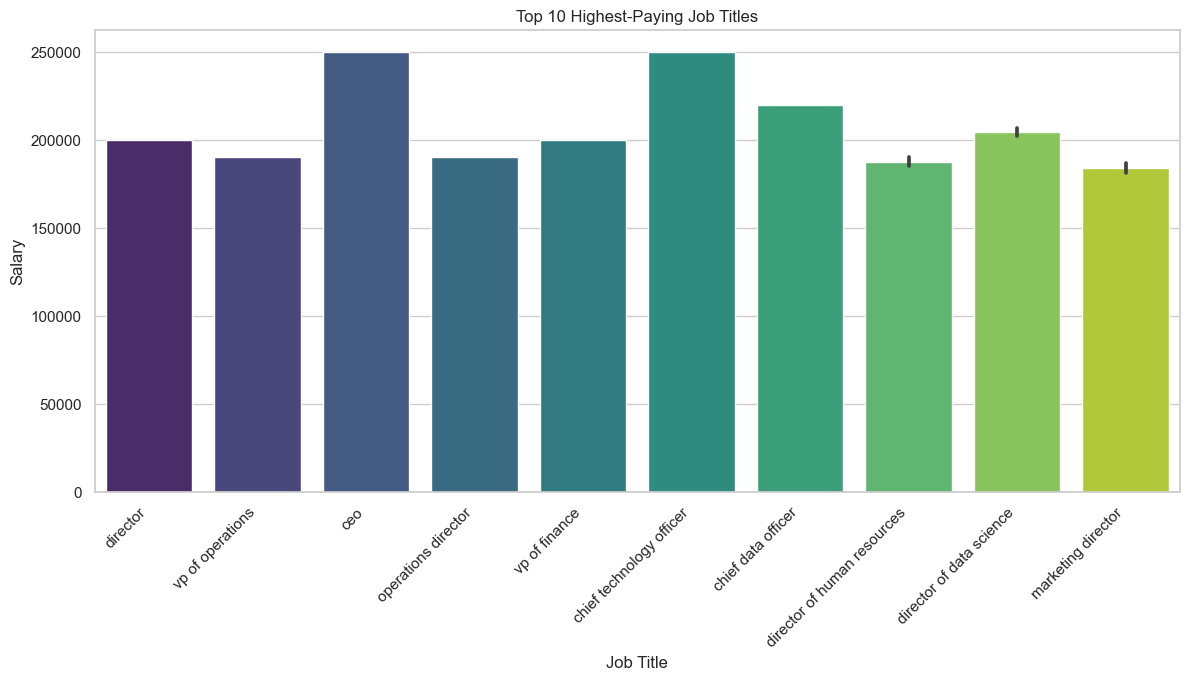

In [18]:
top_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10).index
plt.figure(figsize=(14, 6))
sns.barplot(x='Job Title', y='Salary', data=df[df['Job Title'].isin(top_jobs)], palette='viridis')
plt.title('Top 10 Highest-Paying Job Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


**Lowest-Paying `Job Titles`**

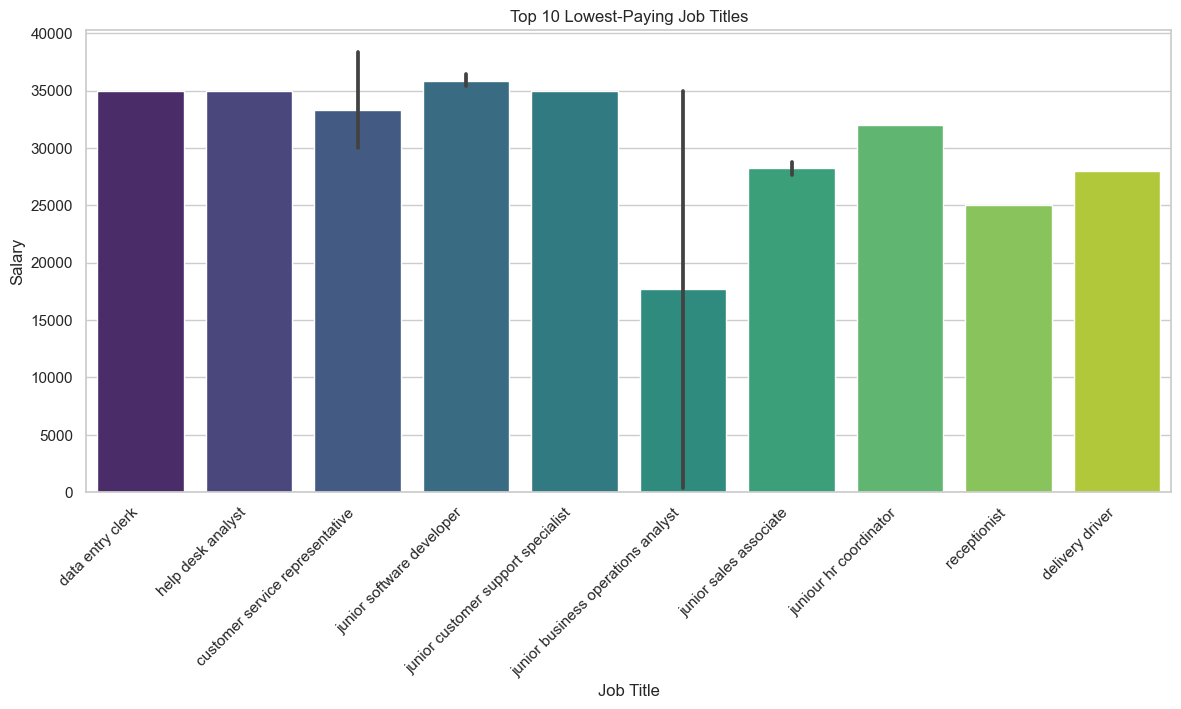

In [19]:
bottom_jobs = df.groupby('Job Title')['Salary'].mean().nsmallest(10).index
plt.figure(figsize=(14, 6))
sns.barplot(x='Job Title', y='Salary', data=df[df['Job Title'].isin(bottom_jobs)], palette='viridis')
plt.title('Top 10 Lowest-Paying Job Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


# **TRAINING AND TESTING PARTS START FROM HERE**

In [20]:
# Extract features and target variable for regression
X_reg = df[['Years of Experience', 'Age', 'Education Level', 'Job Title', 'Gender']]
y_reg = df['Salary']


In [21]:
# Split the dataset into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

**ONE-HOT ENCODING HERE**

In [22]:
# One-hot encode categorical variables (Job Title, Gender, Education Level)
X_train_encoded = pd.get_dummies(X_train_reg, columns=['Job Title', 'Gender', 'Education Level'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reg, columns=['Job Title', 'Gender', 'Education Level'], drop_first=True)

In [23]:
# Align feature names between training and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

**Initializing and train Random Forest, KNN, and Decision Tree models**


In [24]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_encoded, y_train_reg)

RandomForestRegressor(random_state=42)

In [25]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_encoded, y_train_reg)

KNeighborsRegressor()

In [26]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_encoded, y_train_reg)

DecisionTreeRegressor(random_state=42)

**Predict on the test set for all models**


In [27]:
y_pred_rf = rf_model.predict(X_test_encoded)
y_pred_knn = knn_model.predict(X_test_encoded)
y_pred_tree = tree_model.predict(X_test_encoded)


**Evaluate the models**


In [28]:
mse_tree = mean_squared_error(y_test_reg, y_pred_tree)
print(f'Mean Squared Error (Decision Tree): {mse_tree}')

Mean Squared Error (Decision Tree): 72103824.27826302


In [29]:
mse_knn = mean_squared_error(y_test_reg, y_pred_knn)
print(f'Mean Squared Error (KNN): {mse_knn}')

Mean Squared Error (KNN): 88431330.73820895


**Model Selection: SELECTING RANDOM FOREST AS IT GOT THE LOWEST MEAN SQUARE**

In [30]:
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Squared Error (Random Forest): 49686375.98246532


**CLUSTERING: K MEANS**

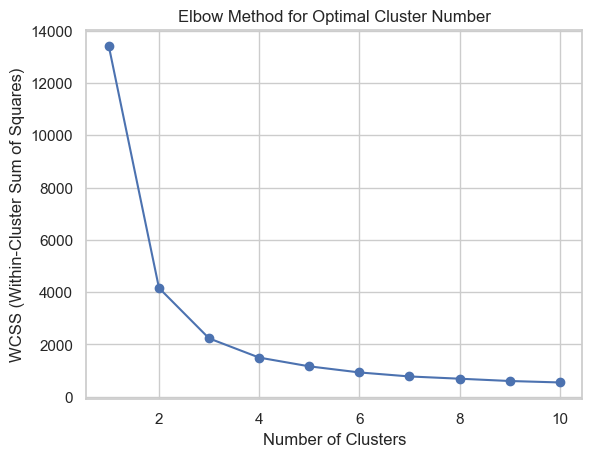

In [31]:
# Select relevant features for clustering
X_clustering = df[['Years of Experience', 'Age']]

# Standardize the features (optional but recommended for K-Means)
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the elbow method, select the optimal number of clusters (k)
k = 3  # Example, adjust based on the elbow method plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_clustering_scaled)


**CLASSIFICATION: DECISION TREE CLASSIFIER**


In [32]:
# Define features for classification
X_classification = df[['Years of Experience', 'Age', 'Education Level', 'Job Title', 'Gender']]

# Encode categorical variables for classification
X_classification_encoded = pd.get_dummies(X_classification, columns=['Job Title', 'Gender', 'Education Level'], drop_first=True)

# Define target variable for classification (e.g., salary ranges)
# Replace the following line with your actual salary range labels
y_classification = pd.cut(df['Salary'], bins=[0, 50000, 100000, 150000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

# Split the dataset into training and testing sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification_encoded, y_classification, test_size=0.2, random_state=42
)

# Initialize and train Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_classification, y_train_classification)

# Predict on the test set for classification
y_pred_classification = classifier.predict(X_test_classification)

# Evaluate the classification model
accuracy = accuracy_score(y_test_classification, y_pred_classification)
classification_report_result = classification_report(y_test_classification, y_pred_classification)

print(f'Classification Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report_result)


Classification Accuracy: 0.9477611940298507

Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.92      0.93       355
         Low       0.98      0.94      0.96       188
      Medium       0.94      0.95      0.94       414
   Very High       0.96      0.97      0.96       383

    accuracy                           0.95      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.95      0.95      0.95      1340



**Accuracy Check**

In [ ]:
# Compare predicted salaries to actual salaries
df_results = pd.DataFrame({'Actual Salary': y_test_reg, 'Predicted Salary (Random Forest)': y_pred_rf})
print(df_results.head(10))  # Display the first 10 rows for comparison


      Actual Salary  Predicted Salary (Random Forest)
1883       150000.0                     150000.000000
2630        75969.0                      76731.880833
498        100000.0                     100000.000000
5973        60000.0                      61535.874331
4108        80000.0                      80000.000000
1041       190000.0                     193815.772439
4848        72000.0                      72000.000000
6617        55000.0                      55000.000000
1086       195000.0                     197413.679766
5530       130000.0                     131893.427211


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_rf)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 49686375.98246532


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2773.39835897833


In [ ]:
# Calculate R-squared (R2) score
r2 = r2_score(y_test_reg, y_pred_rf)
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.9825751057085508


In [ ]:
# Display the first 10 rows for comparison
df_results = pd.DataFrame({'Actual Salary': y_test_reg, 'Predicted Salary (Random Forest)': y_pred_rf})
print(df_results.head(10))

      Actual Salary  Predicted Salary (Random Forest)
1883       150000.0                     150000.000000
2630        75969.0                      76731.880833
498        100000.0                     100000.000000
5973        60000.0                      61535.874331
4108        80000.0                      80000.000000
1041       190000.0                     193815.772439
4848        72000.0                      72000.000000
6617        55000.0                      55000.000000
1086       195000.0                     197413.679766
5530       130000.0                     131893.427211


**Comparison of Actual and Predicted Salaries using Random Forest**

      Actual Salary  Predicted Salary (Random Forest)
1883       150000.0                     150000.000000
2630        75969.0                      76731.880833
498        100000.0                     100000.000000
5973        60000.0                      61535.874331
4108        80000.0                      80000.000000
1041       190000.0                     193815.772439
4848        72000.0                      72000.000000
6617        55000.0                      55000.000000
1086       195000.0                     197413.679766
5530       130000.0                     131893.427211


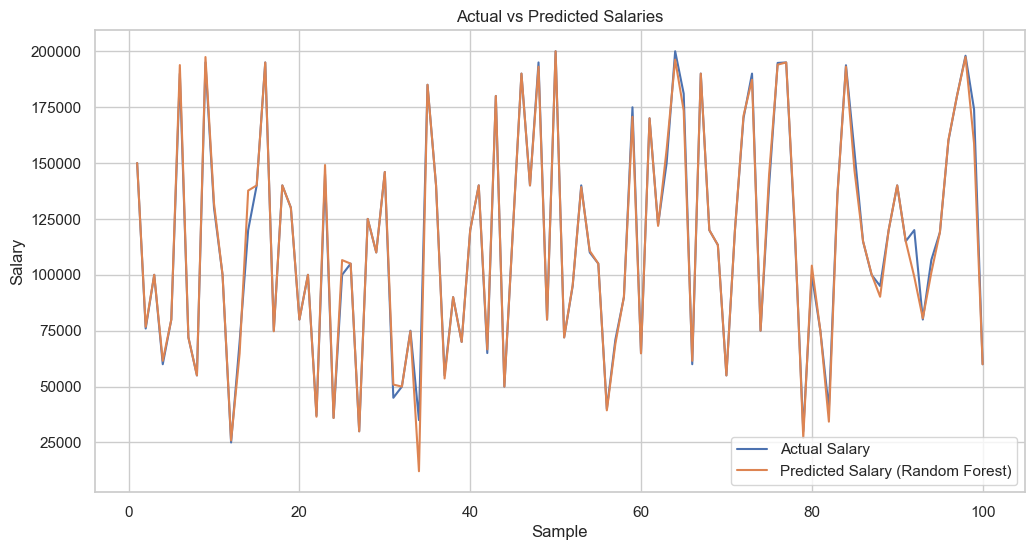

In [ ]:
# Compare predicted salaries to actual salaries
df_results = pd.DataFrame({'Actual Salary': y_test_reg, 'Predicted Salary (Random Forest)': y_pred_rf})

# Display the first 10 rows for comparison
print(df_results.head(10))

# Plot the first 100 samples for visual comparison
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 101), y='Actual Salary', data=df_results.head(100), label='Actual Salary')
sns.lineplot(x=range(1, 101), y='Predicted Salary (Random Forest)', data=df_results.head(100), label='Predicted Salary (Random Forest)')
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Sample')
plt.ylabel('Salary')
plt.legend()
plt.show()

**Creating and Visualizing Predictions for KNN and Decision Tree Models**

In [ ]:

# predictions from your models
predictions_knn = knn_model.predict(X_test_encoded)
predictions_tree = tree_model.predict(X_test_encoded)

# Create a DataFrame for predictions with the same index as the test set
df_predictions = pd.DataFrame({
    'Predicted_Salary_KNN': predictions_knn,
    'Predicted_Salary_Tree': predictions_tree,
}, index=X_test_encoded.index)

# Concatenate the predictions DataFrame with the original DataFrame
df = pd.concat([df, df_predictions], axis=1)

# Drop rows with missing values in Salary or Predicted_Salary_KNN
df_plot_knn = df[['Salary', 'Predicted_Salary_KNN']].dropna()

In [ ]:
# Drop rows with missing values in Salary or Predicted_Salary_Tree
df_plot_tree = df[['Salary', 'Predicted_Salary_Tree']].dropna()

In [ ]:
# Drop duplicate columns
df_plot_knn = df_plot_knn.loc[:, ~df_plot_knn.columns.duplicated()]
df_plot_tree = df_plot_tree.loc[:, ~df_plot_tree.columns.duplicated()]

# VISUALIZATION OF ACTUAL VS PREDICTED SALARY/OTHER GRAPHS

**`Actual` vs. `Predicted` Values for KNN**


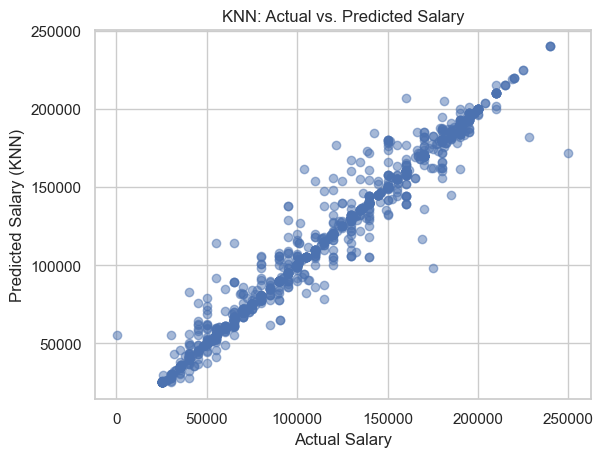

In [ ]:
# Visualize the actual vs. predicted values for KNN
plt.scatter(df_plot_knn['Salary'], df_plot_knn['Predicted_Salary_KNN'], alpha=0.5)
plt.title('KNN: Actual vs. Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (KNN)')
plt.show()


**`Actual` vs. `Predicted` Values for Decision Tree**


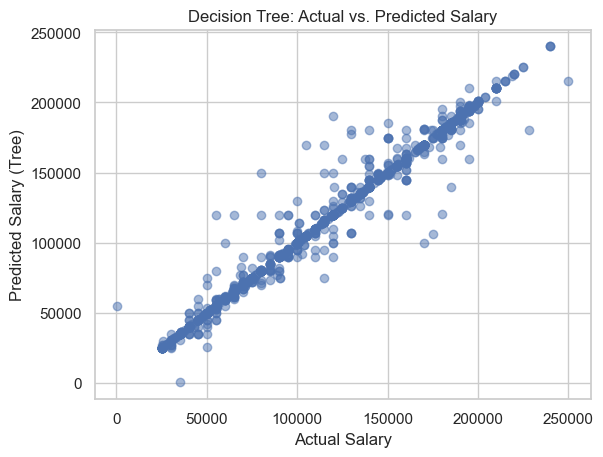

In [ ]:
plt.scatter(df_plot_tree['Salary'], df_plot_tree['Predicted_Salary_Tree'], alpha=0.5)
plt.title('Decision Tree: Actual vs. Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (Tree)')
plt.show()

**Scatter Plot for `Random Forest Regression`**

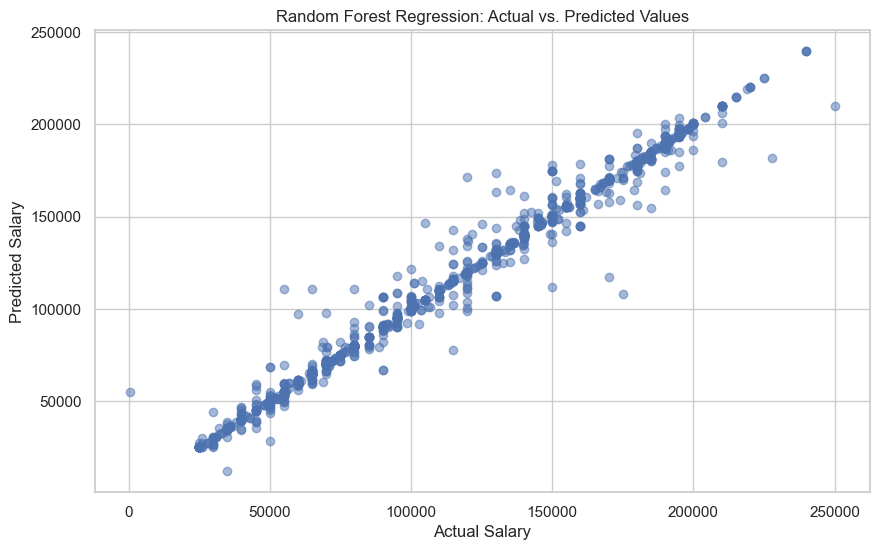

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_rf, alpha=0.5)
plt.title('Random Forest Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

**Bar chart for `Random Forest Feature Importance`**


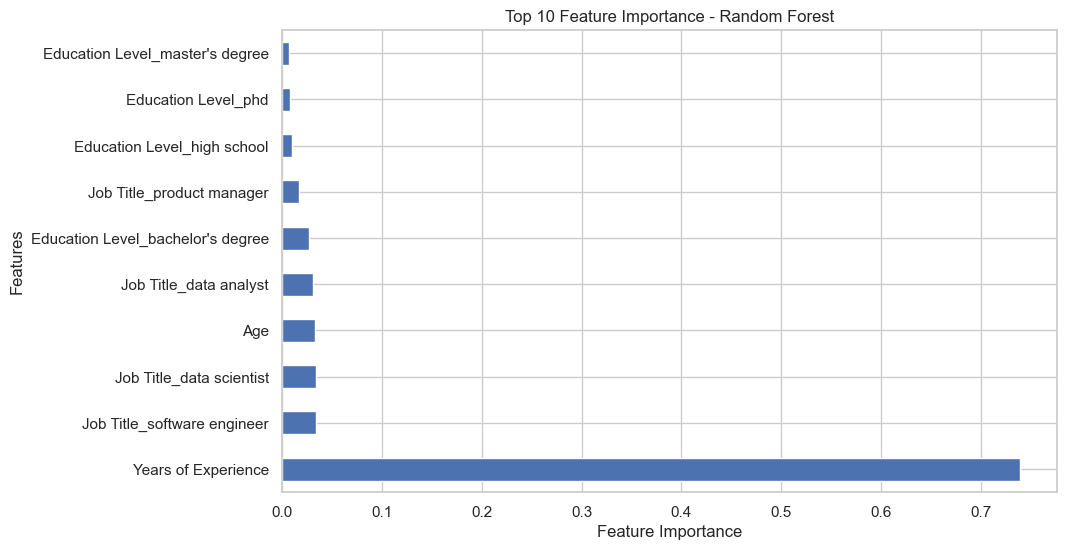

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train_encoded.columns)
feature_importance.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

**Cluster Plot for `K-Means Clustering`**

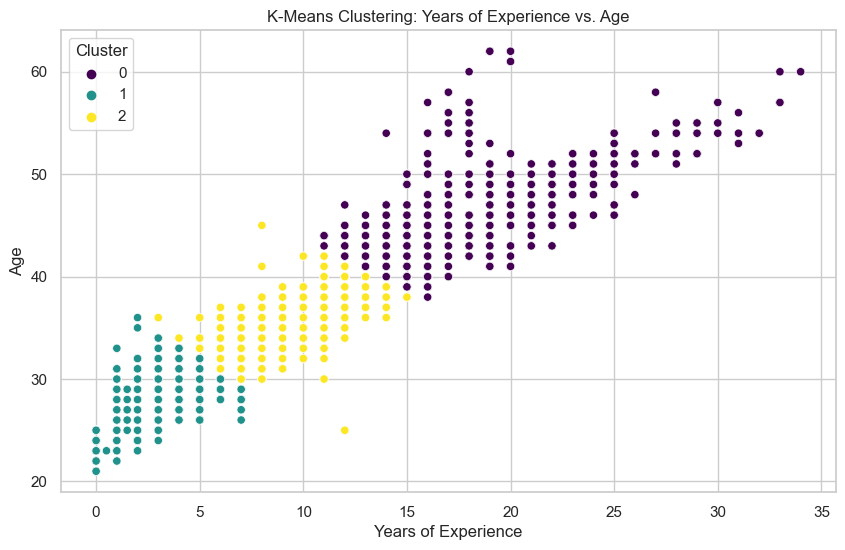

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Age', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering: Years of Experience vs. Age')
plt.show()